In [1]:
from once_for_all.evaluation.perf_dataset import PerformanceDataset
from utils.config_utils import get_mfcc_params
import pandas as pd
import json
import os

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
ft_extr_type = "mfcc"
params_id = 1

In [3]:
path = "eval/" + ft_extr_type + str(params_id) + "/"

In [4]:
if ft_extr_type == "mfcc":
    n_mfcc_bins, ft_extr_params_list = get_mfcc_params(params_id)
    
ft_extr_params = ft_extr_params_list[0]

In [5]:
performance_dataset = PerformanceDataset(path, use_csv=False)
data = performance_dataset.load_dataset(ft_extr_params)

In [6]:
df = None
for k, v in data.items():
    if df is None:
        df = pd.json_normalize(v)
        df = pd.concat([pd.json_normalize(json.loads(k)), df], axis=1)
    else:
        row = pd.json_normalize(v)
        row = pd.concat([pd.json_normalize(json.loads(k)), row], axis=1)
        df = df.append(row)

print(len(df))
df.head(2)

2857


,w,ks,d,e,ft_extr_params,ft_extr_params,data_shape,top1,net_info.params,net_info.flops,net_info.gpu4 latency.val,net_info.gpu4 latency.hist.warmup,net_info.gpu4 latency.hist.sample,net_info.cpu latency.val,net_info.cpu latency.hist.warmup,net_info.cpu latency.hist.sample
0,"[0, 0, 0, 0, 0]","[3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 3, 3, 3, 3, 7, 5]","[3, 4, 1, 4]","[1, 3, 3, 1, 2, 3, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3]","[40, 40]","[40, 40]","[1, 51, 10]",89.972775,242572,12158080.0,3.879666,"[40.253400802612305, 5.028009414672852, 4.4429...","[[38.79666328430176, 10]]",7.554412,"[27.745962142944336, 7.898569107055664, 6.9708...","[[75.54411888122559, 10]]"
0,"[0, 0, 0, 0, 0]","[3, 3, 3, 3, 3, 3, 3, 5, 7, 5, 7, 7, 5, 3, 5, 7]","[1, 3, 2, 3]","[2, 1, 1, 2, 1, 2, 3, 1, 1, 3, 3, 1, 3, 2, 1, 1]","[40, 40]","[40, 40]","[1, 51, 10]",88.770416,162508,5018240.0,2.577281,"[10.90693473815918, 2.646207809448242, 2.63619...","[[25.772809982299805, 10]]",4.805994,"[9.809494018554688, 6.09588623046875, 4.951953...","[[48.059940338134766, 10]]"


In [7]:
df2 = df

In [9]:
import numpy as np
ks_mean = np.mean(df['ks'].tolist(), axis=1)
df2['ks_mean'] = ks_mean

e_mean = np.mean(df['e'].tolist(), axis=1)
df2['e_mean'] = e_mean

d_mean = np.mean(df['d'].tolist(), axis=1)
df2['d_mean'] = d_mean




df2['acc_params_ratio'] = df['top1'] / df['net_info.params']
df2['acc_flops_ratio'] = df['top1'] / df['net_info.flops']
df2

,w,ks,d,e,ft_extr_params,ft_extr_params,data_shape,top1,net_info.params,net_info.flops,...,net_info.gpu4 latency.hist.warmup,net_info.gpu4 latency.hist.sample,net_info.cpu latency.val,net_info.cpu latency.hist.warmup,net_info.cpu latency.hist.sample,ks_mean,e_mean,d_mean,acc_params_ratio,acc_flops_ratio
0,"[0, 0, 0, 0, 0]","[3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 3, 3, 3, 3, 7, 5]","[3, 4, 1, 4]","[1, 3, 3, 1, 2, 3, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3]","[40, 40]","[40, 40]","[1, 51, 10]",89.972775,242572,12158080.0,...,"[40.253400802612305, 5.028009414672852, 4.4429...","[[38.79666328430176, 10]]",7.554412,"[27.745962142944336, 7.898569107055664, 6.9708...","[[75.54411888122559, 10]]",3.875,2.0000,3.00,0.000371,0.000007
0,"[0, 0, 0, 0, 0]","[3, 3, 3, 3, 3, 3, 3, 5, 7, 5, 7, 7, 5, 3, 5, 7]","[1, 3, 2, 3]","[2, 1, 1, 2, 1, 2, 3, 1, 1, 3, 3, 1, 3, 2, 1, 1]","[40, 40]","[40, 40]","[1, 51, 10]",88.770416,162508,5018240.0,...,"[10.90693473815918, 2.646207809448242, 2.63619...","[[25.772809982299805, 10]]",4.805994,"[9.809494018554688, 6.09588623046875, 4.951953...","[[48.059940338134766, 10]]",4.500,1.7500,2.25,0.000546,0.000018
0,"[0, 0, 0, 0, 0]","[3, 3, 3, 3, 3, 3, 3, 7, 5, 5, 5, 7, 5, 3, 5, 3]","[4, 1, 2, 1]","[1, 1, 2, 2, 3, 1, 2, 3, 1, 2, 3, 3, 3, 3, 1, 2]","[40, 40]","[40, 40]","[1, 51, 10]",89.042653,131724,8513216.0,...,"[7.712364196777344, 2.5153160095214844, 2.3503...","[[23.85425567626953, 10]]",3.547668,"[10.105133056640625, 8.335590362548828, 5.6300...","[[35.4766845703125, 10]]",4.125,2.0625,2.00,0.000676,0.000010
0,"[0, 0, 0, 0, 0]","[3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 7, 3, 5, 5, 3, 3]","[3, 2, 2, 4]","[3, 3, 2, 2, 2, 3, 3, 3, 1, 2, 3, 2, 3, 2, 1, 1]","[40, 40]","[40, 40]","[1, 51, 10]",89.019966,203276,12241728.0,...,"[3.6563873291015625, 3.354310989379883, 3.4177...","[[36.47971153259277, 10]]",5.412292,"[10.134458541870117, 6.229877471923828, 5.9950...","[[54.1229248046875, 10]]",3.625,2.2500,2.75,0.000438,0.000007
0,"[0, 0, 0, 0, 0]","[3, 3, 3, 3, 3, 3, 5, 3, 5, 5, 5, 7, 3, 5, 3, 5]","[3, 1, 2, 4]","[3, 3, 3, 3, 1, 2, 2, 3, 3, 2, 3, 2, 1, 2, 2, 3]","[40, 40]","[40, 40]","[1, 51, 10]",88.611616,212492,11718848.0,...,"[3.5893917083740234, 3.1185150146484375, 3.032...","[[30.361652374267578, 10]]",5.813336,"[9.081125259399414, 5.685091018676758, 5.35726...","[[58.13336372375488, 10]]",4.000,2.3750,2.50,0.000417,0.000008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,"[0, 0, 0, 0, 0]","[3, 7, 5, 7, 7, 3, 3, 3, 5, 7, 3, 7, 7, 5, 3, 5]","[3, 4, 3, 1]","[1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 3, 2, 3, 3, 1, 2]","[40, 40]","[40, 40]","[1, 51, 10]",89.428316,174604,6675136.0,...,"[3.3817291259765625, 3.2279491424560547, 3.165...","[[29.44493293762207, 10]]",4.215646,"[4.976511001586914, 4.28462028503418, 4.280805...","[[42.15645790100098, 10]]",5.000,1.7500,2.75,0.000512,0.000013
0,"[0, 0, 0, 0, 0]","[3, 7, 5, 7, 7, 3, 3, 5, 3, 7, 3, 5, 5, 3, 7, 3]","[2, 2, 1, 2]","[2, 1, 3, 2, 3, 2, 2, 1, 1, 1, 3, 3, 1, 2, 3, 1]","[40, 40]","[40, 40]","[1, 51, 10]",89.791287,109644,6506432.0,...,"[2.2270679473876953, 1.9521713256835938, 1.940...","[[19.55437660217285, 10]]",2.854705,"[3.513336181640625, 2.908468246459961, 2.87652...","[[28.547048568725586, 10]]",4.750,1.9375,1.75,0.000819,0.000014
0,"[0, 0, 0, 0, 0]","[3, 7, 5, 7, 7, 3, 3, 7, 5, 5, 3, 5, 3, 5, 3, 3]","[2, 2, 4, 1]","[1, 1, 3, 3, 1, 2, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1]","[40, 40]","[40, 40]","[1, 51, 10]",89.609802,143820,4182336.0,...,"[3.021717071533203, 2.8603076934814453, 2.7980...","[[25.91991424560547, 10]]",3.465796,"[3.988504409790039, 3.515958786010742, 3.47065...","[[34.657955169677734, 10]]",4.625,1.9375,2.25,0.000623,0.000021
0,"[0, 0, 0, 0, 0]","[3, 7, 5, 7, 7, 3, 5, 3, 7, 3, 5, 7, 7, 7, 3, 7]","[2, 1, 2, 1]","[1, 1, 3, 1, 2, 1, 1, 3, 2, 1, 1, 3, 3, 3, 2, 2]","[40, 40]","[40, 40]","[1, 51, 10]",89.677860,100684,4023552.0,...,"[2.0704269409179688, 1.909017562866211, 1.9986...","[[18.541812896728516, 10]]",2.397156,"[2.8803348541259766, 2.40278244018

In [18]:
def plot_top_n(df, column_name, in_f_of_column, n):
    temp = df.sort_values(in_f_of_column, ascending=False)
    top_n = temp.head(n)
    
    acc = top_n['top1']
    y = 'top1' 
    x = column_name

    sns.set_context("paper")
    # f, ax = plt.subplots(figsize=(7, 7))
    # ax.set(xscale="log", yscale="log")
    splot = sns.lmplot(x=x, y=y, data=pd.concat([top_n[column_name], acc], axis=1))
    # splot.set(xscale="log")
    

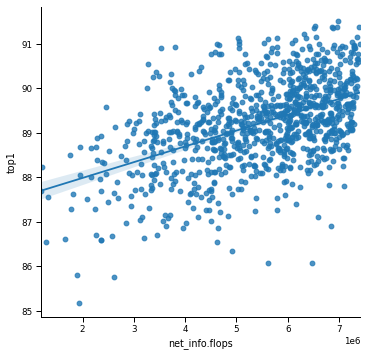

In [28]:
plot_top_n(df, 'net_info.flops', 'acc_flops_ratio', 1000)

/Users/nielsescarfail/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


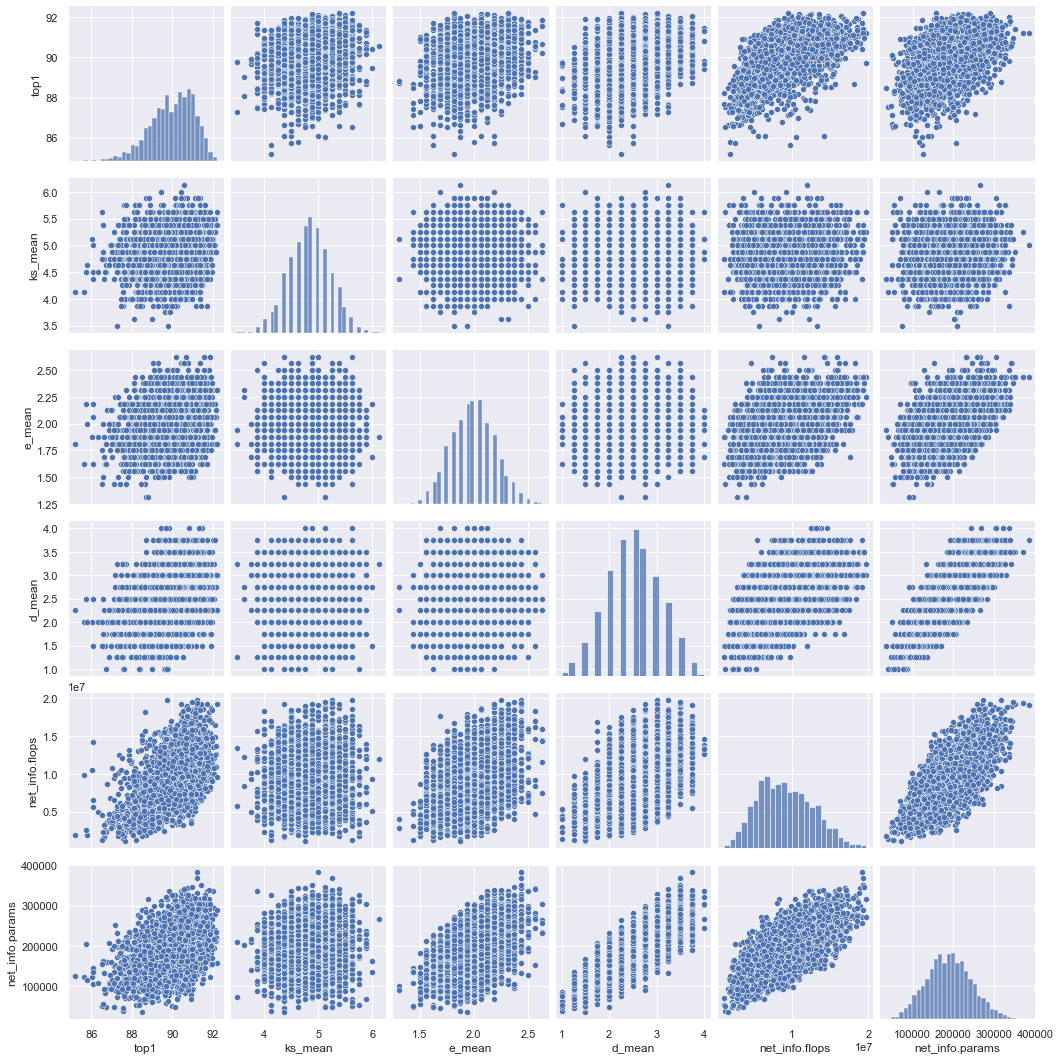

In [82]:
#scatterplot
sns.set()
cols = ['top1', 'ks_mean', 'e_mean', 'd_mean', 'net_info.flops', 'net_info.params']
sns.pairplot(df[cols], size = 2.5)
plt.show();

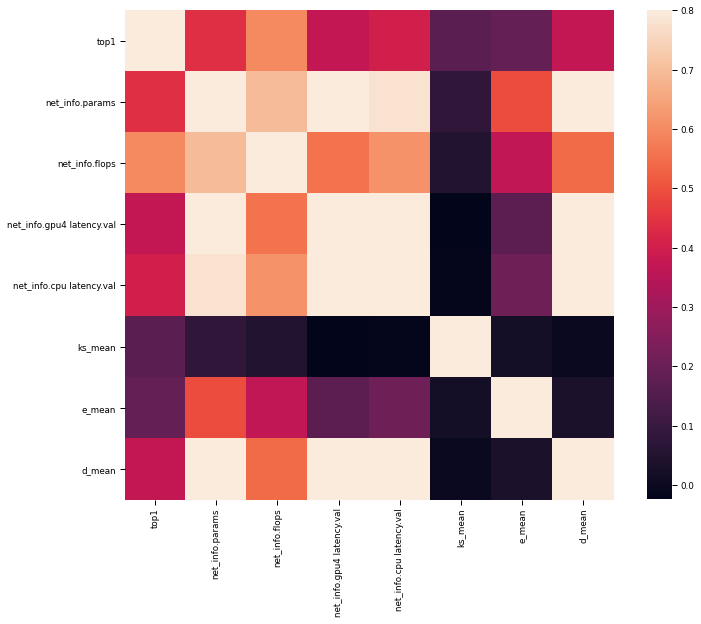

In [75]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

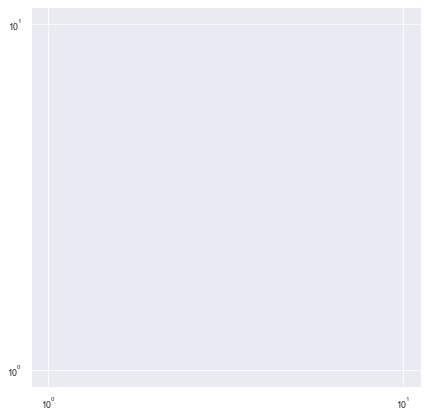

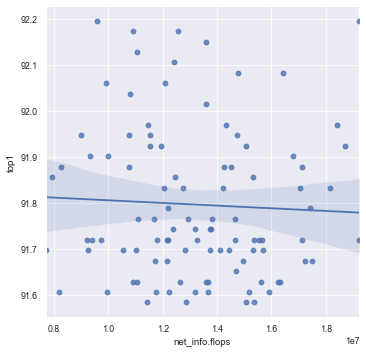

In [85]:
df = top_100
acc = df['top1']
flops = df['net_info.flops'] / 1e6
ks_mean = df['ks_mean']

val_vs_acc = 'net_info.flops' # 'net_info.params'# 'ks_mean' # 'net_info.flops'


y = 'top1' # , 'net_info.flops'
x = val_vs_acc

df_v = df[val_vs_acc]


sns.set_context("paper")
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.lmplot(x=x, y=y, data=pd.concat([df_v, acc], axis=1))


In [74]:
sns.boxplot(x=x, y=y, data=pd.concat([df_v, acc], axis=1), ax=ax)

/Users/nielsescarfail/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:373: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(-.5, len(self.plot_data) - .5, auto=None)


<AxesSubplot:xlabel='d_mean', ylabel='top1'>

In [30]:
# new df from the column of lists
split_df = pd.DataFrame(df['ks'].tolist())
# display the resulting df
split_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,3,3,3,3,3,3,3,3,7,7,3,3,3,3,7,5
1,3,3,3,3,3,3,3,5,7,5,7,7,5,3,5,7
2,3,3,3,3,3,3,3,7,5,5,5,7,5,3,5,3
3,3,3,3,3,3,3,5,3,3,3,7,3,5,5,3,3
4,3,3,3,3,3,3,5,3,5,5,5,7,3,5,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,3,5,3,7,5,3,3,3,7,7,7,3,3,7,3,7
1376,3,5,3,7,5,3,3,5,3,3,3,7,3,5,3,7
1377,3,5,3,7,5,3,3,5,3,7,5,5,3,7,7,7
1378,3,5,3,7,5,3,3,5,5,3,5,3,3,7,7,3


In [19]:
df['top1'].mean()

89.81433759674431